In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [22]:
#Loading and preprocessing the image data
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [23]:
#Extracting features and labels
train_images = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
train_labels = train_data.iloc[:, 0].values

In [24]:
test_images = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
test_labels = test_data.iloc[:, 0].values

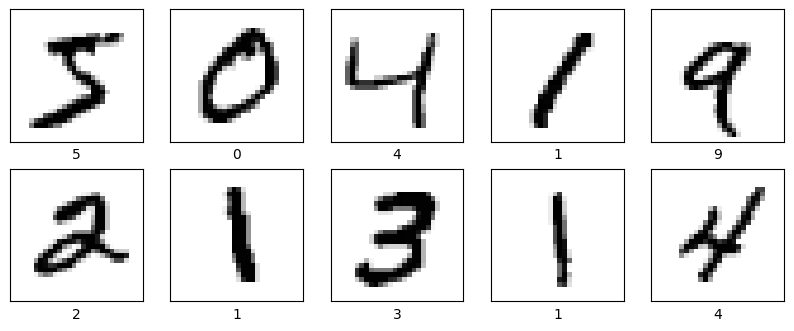

In [25]:
#Displaying the first 10 images with labels
class_names = [str(i) for i in range(10)]
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [27]:
#Defining the model's architecture 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [28]:
#Training the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [29]:
#Estimating the model performance
epochs = 10
history = model.fit(train_images, train_labels, epochs = epochs, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 65s 33ms/step - loss: 0.1479 - accuracy: 0.9547 - val_loss: 0.0365 - val_accuracy: 0.9882
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0369 - val_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0357 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0294 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0318 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0304 -

In [30]:
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)


Test Accuracy: 0.9909999966621399

Test Loss: 0.03257673233747482
